In [3]:
# imports
import pandas as pd
import yfinance as yf
import tweepy
import requests
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
import ssl

2023-04-03 14:20:52.977995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### get the data for sp500 tickers

In [3]:
# uncomment and run if you get an error below
# ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# Get list of S&P 500 ticker symbols
# get current tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# edit brk.b to brkb
sp500_tickers[sp500_tickers.index('BRK.B')] = 'BRK-B'
sp500_tickers[sp500_tickers.index('BF.B')] = 'BF-B'

# Download stock data for each symbol
sp500_data = yf.download(sp500_tickers, start = '2023-03-21',end = '2023-03-29', interval='1d', group_by='ticker')

[*********************100%***********************]  503 of 503 completed


In [4]:
# view the data
sp500_data

MTD                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2023-03-21  1487.959961  1500.229980  1474.469971  1500.219971  1500.219971   
2023-03-22  1492.380005  1511.050049  1449.979980  1452.260010  1452.260010   
2023-03-23  1462.969971  1490.180054  1445.119995  1451.099976  1451.099976   
2023-03-24  1447.260010  1459.750000  1428.099976  1459.750000  1459.750000   
2023-03-27  1478.069946  1498.380005  1456.660034  1481.530029  1481.530029   
2023-03-28  1479.040039  1485.089966  1462.650024  1473.640015  1473.640015   

                         PFG                                   ...  \
           Volume       Open       High        Low      Close  ...   
Date                                                           ...   
2023-03-21  86900  74.750000  75.660004  74.680000  75.139999  ...   
2023-03-22  92100  75.070000  75.470001  72.339996  72.370003  ...   
2023-03-23  73100  72.379997  73.889999  70.930000  71.260002  ...   
2023-03-24  63500  69.959999  71.599998  68.940002  71.589996  ...   
2023-03-27  79000  73.330002  73.330002  71.690002  72.330002  ...   
2023-03-28  45200  71.919998  72.589996  71.519997  72.309998  ...   

                   MTB                                         PHM             \
                   Low       Close   Adj Close   Volume       Open       High   
Date                                                                            
2023-03-21  126.040001  127.550003  127.550003  2805500  55.910000  56.500000   
2023-03-22  117.580002  117.660004  117.660004  2660600  56.540001  57.169998   
2023-03-23  112.320000  112.370003  112.370003  2990200  56.790001  57.889999   
2023-03-24  110.000000  114.930000  114.930000  3069300  56.209999  56.939999   
2023-03-27  116.349998  117.930000  117.930000  2421200  56.930000  57.439999   
2023-03-28  117.599998  119.279999  119.279999  1757900  56.730000  57.570000   

                                                      
                  Low      Close  Adj Close   Volume  
Date                                                  
2023-03-21  55.610001  55.820000  55.820000  2826800  
2023-03-22  55.919998  55.930000  55.930000  3243300  
2023-03-23  55.860001  56.389999  56.389999  2749400  
2023-03-24  55.259998  56.660000  56.660000  2105700  
2023-03-27  56.470001  56.549999  56.549999  1953900  
2023-03-28  56.709999  57.270000  57.270000  1683300  

[6 rows x 3018 columns]

In [5]:
# get the tickers for the stocks
tickers = sp500_data.columns.levels[0].tolist()

## set up twitter api to collect the tweets

In [ ]:
# Set up Twitter API credentials
# Add credientials here

client_id = ''
client_secret = ''
access_token = ''
access_token_secret = ''
bearer_token = ''

In [ ]:
# split tickers into 4 groups to run each seperately
tickers_luke = tickers[0:125]
tickers_roma = tickers[125:250]
tickers_daniel = tickers[250:375]
tickers_vedanshi = tickers[375:500]

In [ ]:
# create a dataframe to store the sentiment scores and the ticker and the text
df = pd.DataFrame(columns=['ticker', 'polarity_score', 'sentiment_score', 'text'])
tickers = tickers_vedanshi

for ticker in tickers:
    
    query = f'{ticker} lang:en'
    
    url = 'https://api.twitter.com/2/tweets/search/recent'
    headers = {'Authorization': f'Bearer {bearer_token}'}
    
    params = {'query': query, 'max_results': 100}
    response = requests.get(url, headers=headers, params=params)
    tweets = response.json()['data']
    
    for tweet in tweets:
        tweet = tweet['text']
        blob = TextBlob(tweet)
        polarity_score = blob.sentiment.polarity
        sentiment_score = blob.sentiment.subjectivity
        df.loc[len(df)] = [ticker, polarity_score, sentiment_score, tweet]

In [ ]:
# save each file to csv
df.to_csv('twitter_sentiment_vedanshi.csv')

In [4]:
# read in the csv
df_luke = pd.read_csv('twitter_sentiment_luke.csv')
df_roma = pd.read_csv('twitter_sentiment_roma.csv')
df_daniel = pd.read_csv('twitter_sentiment_daniel.csv',lineterminator='\n')
df_vedanshi = pd.read_csv('twitter_sentiment_vedanshi.csv')

In [5]:
# combine the dataframes
df = pd.concat([df_luke, df_roma, df_daniel, df_vedanshi])

In [6]:
# save the combined dataframe
df.to_csv('twitter_sentiment.csv')

## Create the database with the tickers, polarity and sentiment scores

In [7]:
# average the sentiment score for each ticker
data = df.groupby('ticker').mean()
# reset the header
data = data.reset_index()
data.drop(columns=['Unnamed: 0'],inplace=True)
data

/var/folders/fn/gwc703ds68d7wjnsvd_65zwc0000gn/T/ipykernel_19228/1796640575.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('ticker').mean()


,ticker,polarity_score,sentiment_score
0,A,-0.012711,0.362001
1,AAL,0.168553,0.323706
2,AAP,0.068506,0.322128
3,AAPL,0.130505,0.368049
4,ABBV,0.227979,0.418806
...,...,...,...
495,XOM,0.271027,0.502572
496,XRAY,0.061403,0.325235
497,XYL,0.066161,0.155683
498,YUM,0.163126,0.423962


In [8]:
# rename sentiment_score to subjectivity_score
data.rename(columns={'sentiment_score':'subjectivity_score'},inplace=True)

In [9]:
data.describe()

,polarity_score,subjectivity_score
count,500.000000,500.000000
mean,0.121545,0.324098
std,0.071607,0.087091
min,-0.047610,0.011333
25%,0.072825,0.273121
50%,0.115456,0.326312
75%,0.163734,0.380575
max,0.435876,0.636073


In [82]:
# add a column to the dataframe to store the 5-day return
data['five_day_return'] = 0
for ticker in tickers:
    # Calculate the 5-day return for the ticker
    stock_data = sp500_data[ticker]['Close']
    adj_close = sp500_data[ticker]['Adj Close']
    five_day_return = (adj_close.iloc[-1] - adj_close.iloc[0]) / adj_close.iloc[0]

    # append the 5-day return to the dataframe
    data.loc[data['ticker'] == ticker, 'five_day_return'] = five_day_return


In [83]:
# add a column to the dataframe to store the market cap
market_cap = pd.read_csv('spy_mktcap.csv')
all_data = pd.merge(data, market_cap, on='ticker', how='left')
all_data.drop(columns=['company','peRatio','priceToSalesRatio'],inplace=True)
all_data.set_index('ticker',inplace=True)
all_data.head()

,polarity_score,subjectivity_score,five_day_return,marketCap,volume
ticker,,,,,
A,-0.012711,0.362001,-0.031968,3.877513e+10,1571589.0
AAL,0.168553,0.323706,-0.027140,8.879040e+09,19867846.0
AAP,0.068506,0.322128,-0.033809,6.587740e+09,2009771.0
AAPL,0.130505,0.368049,-0.010234,2.514582e+12,59166509.0
ABBV,0.227979,0.418806,0.009441,2.739719e+11,4677704.0


In [84]:
# find all market caps that are not in the dataframe
missing_market_caps = []
for ticker in sp500_tickers:
    if ticker not in market_cap['ticker'].tolist():
        missing_market_caps.append(ticker)
missing_market_caps

['BRK-B', 'BF-B', 'BG', 'CBOE', 'FICO', 'PODD', 'PEG']

however, we are going to focus on the polrity and sentiment scores and predict the 5-day-returns for it.

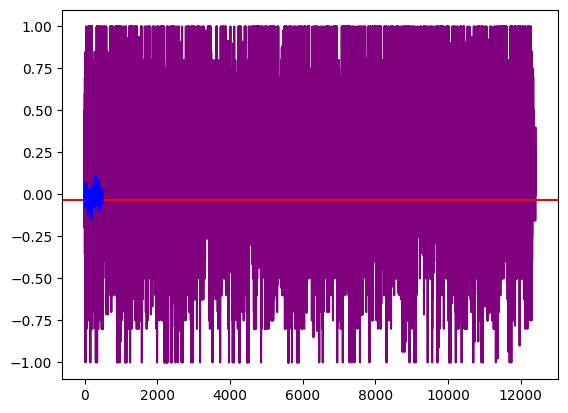

In [121]:
# plot porality score from the dataframe df
plt.plot(df['polarity_score'], color='purple')
# plot line at 5-day return
plt.axhline(data['five_day_return'][0], color='red')
plt.plot(data['five_day_return'], color='blue')

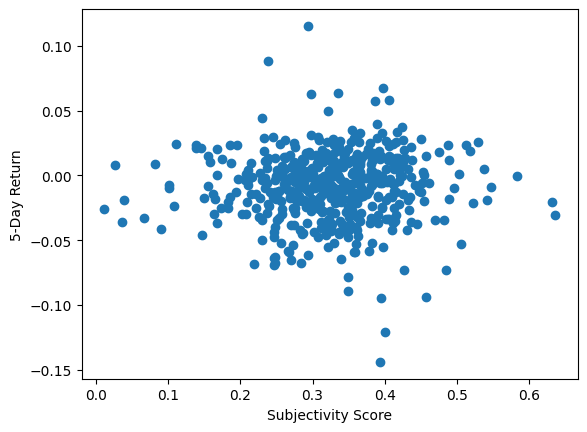

In [87]:
# plot the sentiment score vs the 5-day return
plt.scatter(data['subjectivity_score'], data['five_day_return'])
plt.xlabel('Subjectivity Score')
plt.ylabel('5-Day Return')
plt.show()

# Model

### The neural network

In [19]:
# Split the data
from sklearn.discriminant_analysis import StandardScaler
X = all_data[['polarity_score', 'subjectivity_score']]
y = all_data['five_day_return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
13/13 [==============================] - 2s 5ms/step - loss: 0.1719 - mse: 0.1719
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1279 - mse: 0.1279
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0955 - mse: 0.0955
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - mse: 0.0704
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0520 - mse: 0.0520
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0388 - mse: 0.0388
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0294 - mse: 0.0294
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0224 - mse: 0.0224
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0178 - mse: 0.0178
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0146 - mse: 0.0146
Epoch 11/100
13/13 [==============================] - 0s 6

In [20]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test MSE:', score[1])

# Make predictions
new_data = [[0.2, 0.4], [-0.1, 0.3], [0.3, -0.2]]
new_data = sc.transform(new_data)
predictions = model.predict(new_data)
print(predictions)

Test loss: 0.0015279765939339995
Test MSE: 0.0015279765939339995


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 330ms/step
[[-0.00911918]
 [ 0.07815836]
 [ 0.0123309 ]]


In [21]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


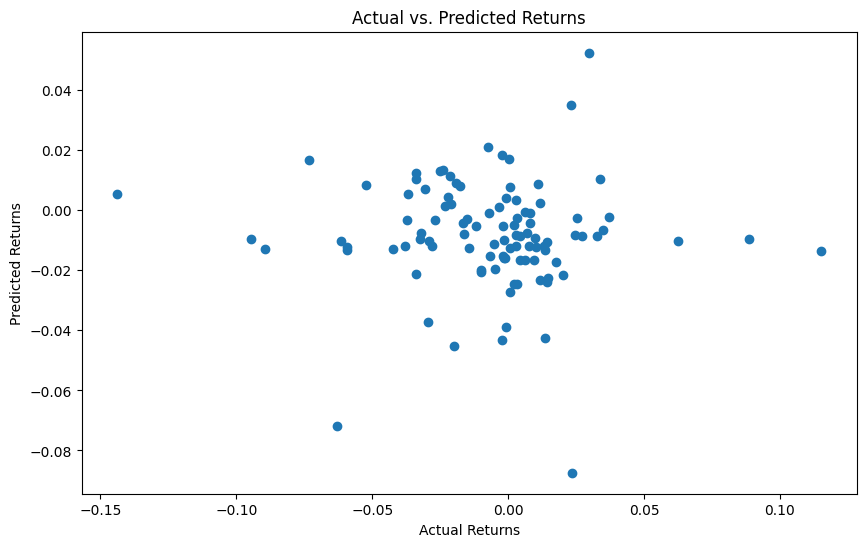

In [22]:
# Plot actual vs. predicted returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs. Predicted Returns")
plt.show()

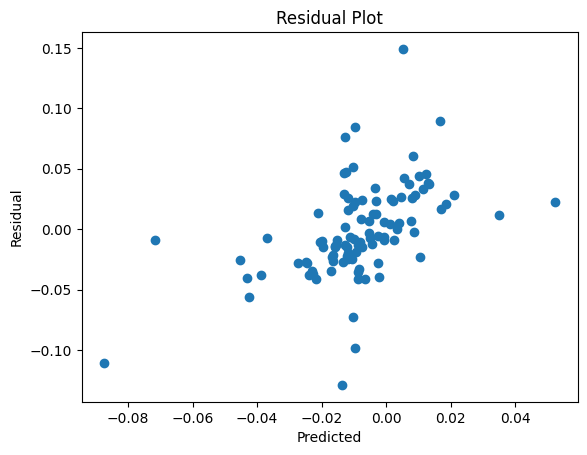

In [25]:
# create a residual plot
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

### Other models

In [31]:
# Cross validation on the classifiers and regressors to get the best model

# hyperparameter tuning for the classifiers and regressors
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 3, 4, 5],
}

param_grid_ada = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
}

param_grid_svm = {
    "C": [0.1, 1],
    "gamma": [1, 0.01, 0.001],
    # "kernel": ["rbf", "poly", "sigmoid"],
}

param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
    "max_depth": [5, 10, 15],
}

# cross validation
cv_values = [3, 5, 10]

# Initializing the models
# Regressors
rf_reg = RandomForestRegressor()
ada_reg = AdaBoostRegressor()
svm_reg = svm.SVR()
xgb_reg = XGBRegressor()

# Hyperparameter tuning
best_scores = {}

# initialize the scores
scores_rf_reg = []
scores_ada_reg = []
scores_svm_reg = []
scores_xgb_reg = []

# loop through the cross validation values
for cv in cv_values:

    # Random Forest Regressor
    rf_reg_cv = GridSearchCV(rf_reg, param_grid_rf, cv=cv)
    rf_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Random Forest Regressor: {rf_reg_cv.best_params_}')
    best_score_rf_reg = rf_reg_cv.best_score_
    scores_rf_reg.append(best_score_rf_reg)
    print(f'Best score for Random Forest Regressor: {best_score_rf_reg}')

    # AdaBoost Regressor
    ada_reg_cv = GridSearchCV(ada_reg, param_grid_ada, cv=cv)
    ada_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for AdaBoost Regressor: {ada_reg_cv.best_params_}')
    best_score_ada_reg = ada_reg_cv.best_score_
    scores_ada_reg.append(best_score_ada_reg)
    print(f'Best score for AdaBoost Regressor: {best_score_ada_reg}')

    # SVM Regressor
    svm_reg_cv = GridSearchCV(svm_reg, param_grid_svm, cv=cv)
    svm_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for SVM Regressor: {svm_reg_cv.best_params_}')
    best_score_svm_reg = svm_reg_cv.best_score_
    scores_svm_reg.append(best_score_svm_reg)
    print(f'Best score for SVM Regressor: {best_score_svm_reg}')

    # Gradient Boost Regressor
    xgb_reg_cv = GridSearchCV(xgb_reg, param_grid_xgb, cv=cv)
    xgb_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Gradient Boost Regressor: {xgb_reg_cv.best_params_}')
    best_score_xgb_reg = xgb_reg_cv.best_score_
    scores_xgb_reg.append(best_score_xgb_reg)
    print(f'Best score for Gradient Boost Regressor: {best_score_xgb_reg}')

# create a dataframe to store the results
model_score_df = pd.DataFrame({
    'Random Forest Regressor': scores_rf_reg,
    'AdaBoost Regressor': scores_ada_reg,
    'SVM Regressor': scores_svm_reg,
    'Gradient Boost Regressor': scores_xgb_reg
    })


Best parameters for Random Forest Regressor: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest Regressor: -0.12038997867452676
Best parameters for AdaBoost Regressor: {'learning_rate': 0.001, 'n_estimators': 100}
Best score for AdaBoost Regressor: -0.03579417323219247
Best parameters for SVM Regressor: {'C': 0.1, 'gamma': 1}
Best score for SVM Regressor: -0.3881753663196385
Best parameters for Gradient Boost Regressor: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Best score for Gradient Boost Regressor: -0.22213858038844866
Best parameters for Random Forest Regressor: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Random Forest Regressor: -0.08204937500936889
Best parameters for AdaBoost Regressor: {'learning_rate': 0.001, 'n_estimators': 500}
Best score for AdaBoost Regressor: -0.019432652001059925
Best parameters for SVM Regressor: {'C': 0.1, 'gamma': 1}
Best score for SVM Regressor: -0.500228677344

From the results, it appears that the best model is the AdaBoost Regressor, as it has the lowest negative mean squared error score (-0.0166) and its parameters are the simplest (learning_rate: 0.001, n_estimators: 100). However, it is important to note that the dataset used for training and testing may not be representative of future data, so the results should be taken with caution. It may be helpful to evaluate the model's performance on a separate test set or to use other evaluation metrics in addition to mean squared error.

In [45]:
model_score_df.head()

,Random Forest Regressor,AdaBoost Regressor,SVM Regressor,Gradient Boost Regressor
0,-0.120390,-0.035794,-0.388175,-0.222139
1,-0.082049,-0.019433,-0.500229,-0.181950
2,-0.081606,-0.033451,-0.584188,-0.149214


In [64]:
best_model = model_score_df.idxmax(axis=1)[0]
best_model_params = ada_reg_cv.best_params_
best_model_score = model_score_df.max(axis=1).max()

print(f'the best model is: {best_model}')
print(f'the best model parameters are: {best_model_params}')
print(f'the best model score is: {best_model_score}')

the best model is: AdaBoost Regressor
the best model parameters are: {'learning_rate': 0.001, 'n_estimators': 100}
the best model score is: -0.019432652001059925


In [122]:
# get the y_pred for the best model (adaboost part 2)
best_model = AdaBoostRegressor(**best_model_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

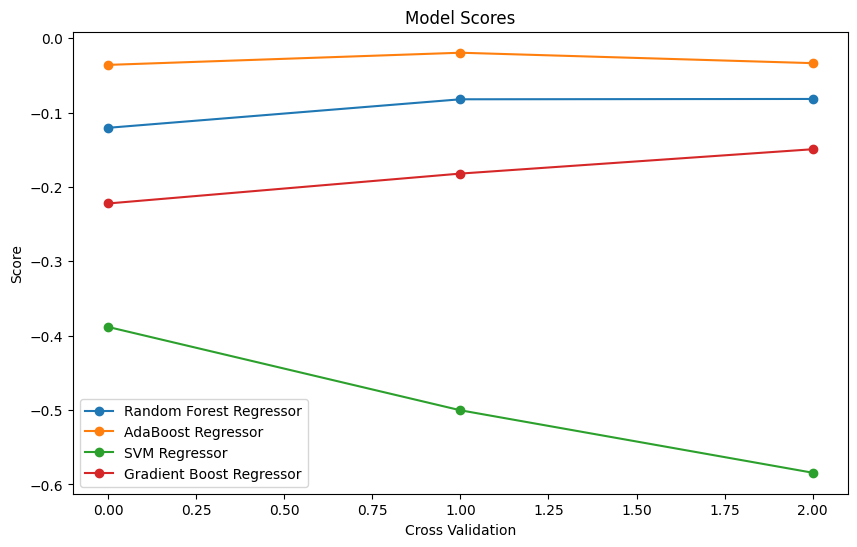

In [68]:
# plot all the models in the dataframe
model_score_df.plot(figsize=(10, 6), marker='o')
plt.title('Model Scores')
plt.xlabel('Cross Validation')
plt.ylabel('Score')
plt.show()

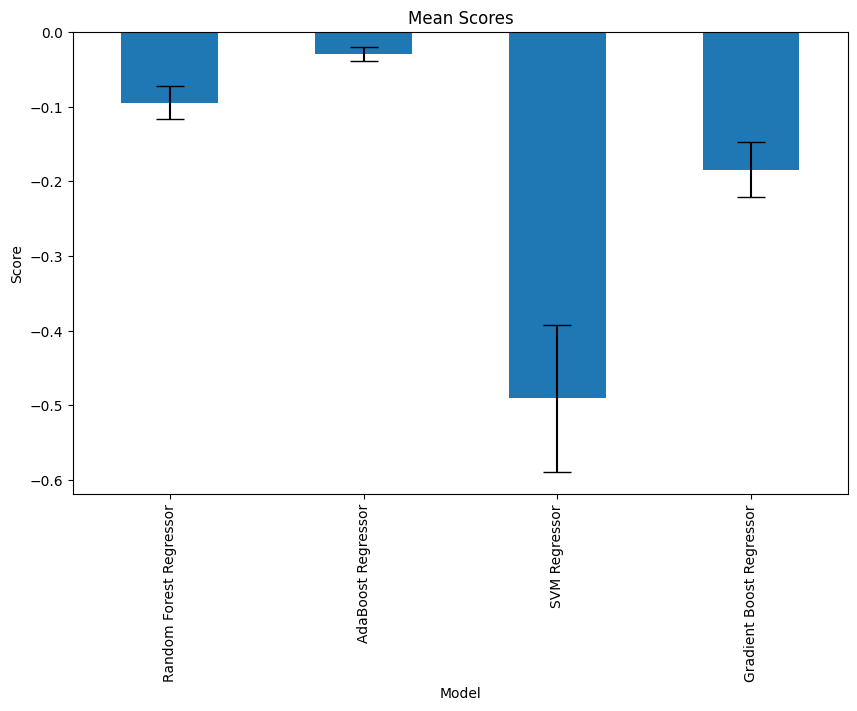

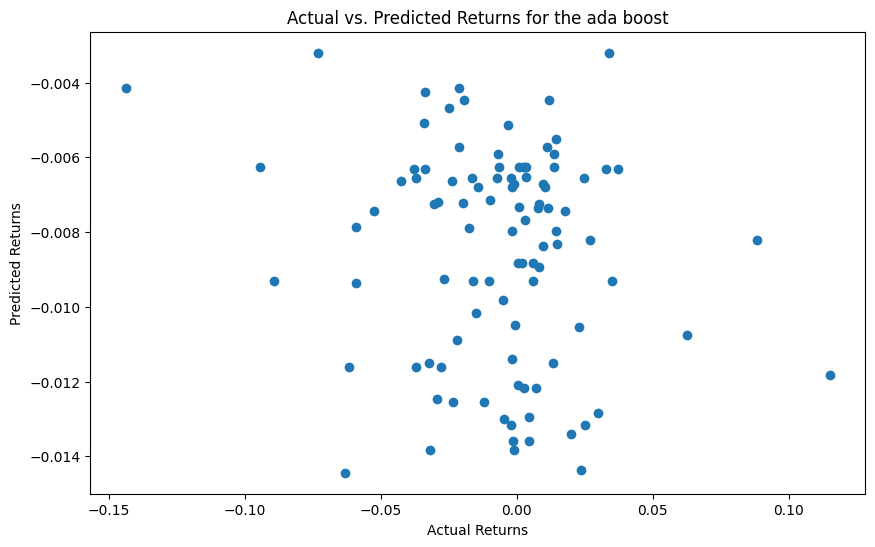

In [69]:
# mean, std dev and max scores plot
model_score_df.mean().plot(kind='bar', figsize=(10, 6), yerr=model_score_df.std(), capsize=10)
plt.title('Mean Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

# Plot actual vs. predicted returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs. Predicted Returns for the ada boost")
plt.show()

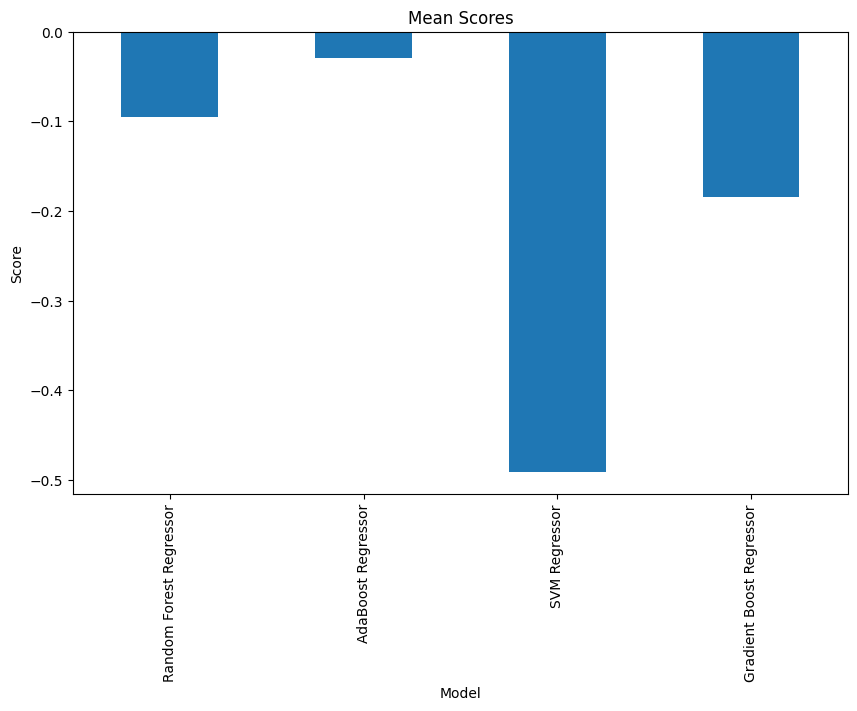

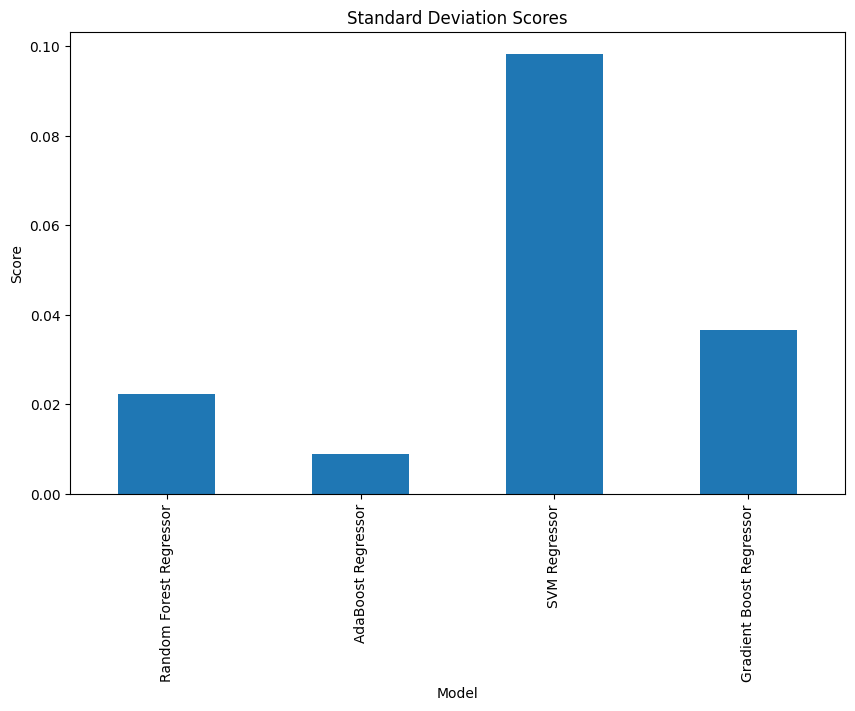

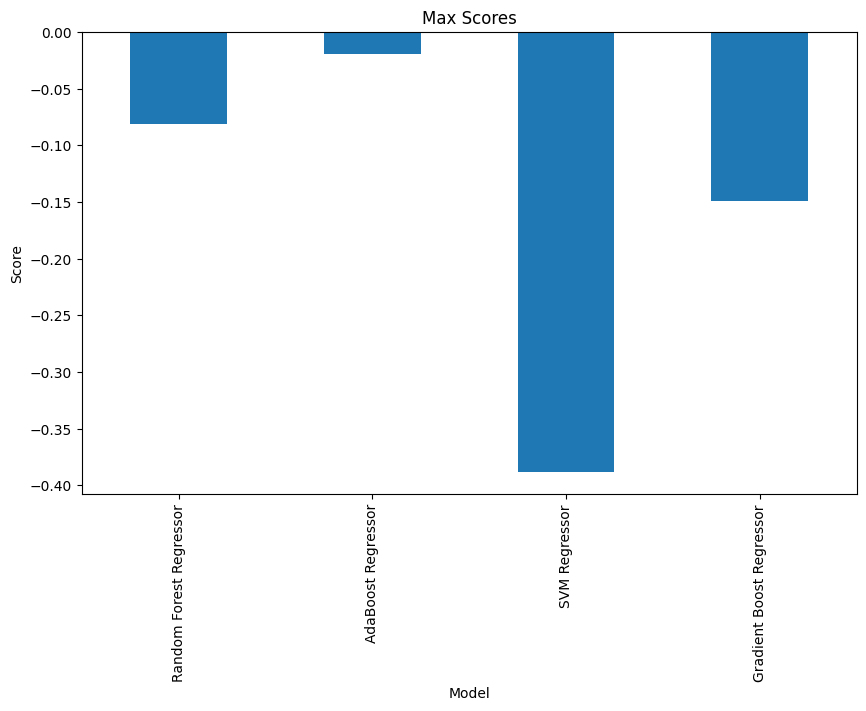

In [70]:
# mean score on all the models plot
model_score_df.mean().plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

# std dev score on all the models plot
model_score_df.std().plot(kind='bar', figsize=(10, 6))
plt.title('Standard Deviation Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

# max score on all the models plot
model_score_df.max().plot(kind='bar', figsize=(10, 6))
plt.title('Max Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

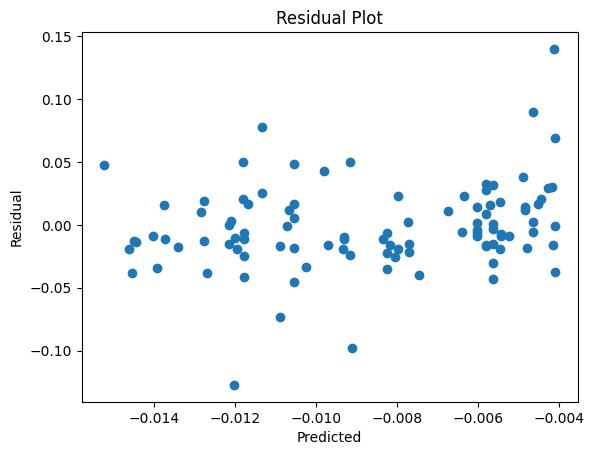

In [123]:
# create a residual plot
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

In [79]:
# mean squared error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# root mean squared error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# r2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
# Adjusted R-squared
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R2 Score: {adj_r2}')
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 0.001180367270060851
Root Mean Squared Error: 0.03435647348114837
Mean Absolute Error: 0.024369480293028687
R2 Score: -0.034607754119430956
Adjusted R2 Score: -0.05593987276106871
Mean Absolute Percentage Error: 249.23331159045347


## Analysis - Is sentiment analysis usable?

In [119]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

past_tense_verbs_count = 0

for text in df['text']:
    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Use part-of-speech tagging to tag each word with its part of speech
    tagged_words = pos_tag(tokens)

    # Loop through each tagged word and identify past tense verbs
    past_tense_verbs = []
    for word, tag in tagged_words:
        if tag == 'VBD':  # VBD is the tag for past tense verbs in NLTK
            past_tense_verbs.append(word)

    if len(past_tense_verbs) > 0:
        # add to counter
        past_tense_verbs_count += 1
        
# number of sentences with past tense verbs
past_tense_verbs_count

13515

In [120]:
# total as compared to the sentences with past tense verbs
past_tense_verbs_count / len(df['text'])

0.27383243845608346

## Analysis - Can we Trade on this Model

Thought Process: Get a dataframe of all tickers, what the model predicted, investment amount, what actually happened, and the gross return

In [16]:
sp500_data_trade = yf.download(sp500_tickers, start = '2023-03-28',end = '2023-04-01', interval='1d', group_by='ticker')

[*********************100%***********************]  503 of 503 completed


In [65]:
tickers_trade = sp500_data_trade.columns.levels[0].tolist()
data_trade = pd.DataFrame({'ticker':tickers_trade})

In [66]:
# add a column to the dataframe to store the 3-day return
data_trade['three_day_return'] = 0
for ticker in tickers_trade:
    # Calculate the 5-day return for the ticker
    adj_close_trade = sp500_data_trade[ticker]['Adj Close']
    three_day_return = (adj_close_trade.iloc[-1] - adj_close_trade.iloc[0]) / adj_close_trade.iloc[0]

    # append the 5-day return to the dataframe
    data_trade.loc[data_trade['ticker'] == ticker, 'three_day_return'] = three_day_return

In [90]:
# Create a DataFrame with the Predicted Values

results_df = pd.DataFrame({'ticker': X_test.index,
                           'Subjectivity': X_test['sentiment_score'],
                           'Predicted Return': y_pred.flatten()})

results_df.set_index('ticker',inplace=True)

In [91]:
# Merging the two dataframes
merged_trade = pd.merge(results_df, data_trade, left_on='ticker', right_on='ticker', how='left')

In [92]:
merged_trade = merged_trade.rename(columns = {'three_day_return':'Return After Prediction'})
merged_trade = merged_trade.rename(columns = {'ticker':'Ticker'})

In [93]:
merged_trade

,Ticker,Subjectivity,Predicted Return,Return After Prediction
0,PCG,0.424641,-0.003312,0.027319
1,BWA,0.186435,-0.009325,0.030208
2,PM,0.311983,-0.005254,0.032049
3,EIX,0.237657,-0.009392,0.038491
4,CMS,0.365612,-0.004977,0.015721
...,...,...,...,...
95,O,0.399430,-0.004299,0.041254
96,CDNS,0.310716,-0.006724,0.033501
97,C,0.382797,-0.004748,0.036931
98,TFX,0.307831,-0.006660,0.028211


**Strategy 1**

In [94]:
# create new column to show investment amount based on y_pred
merged_trade['Investment Amount Strategy 1'] = np.where(merged_trade['Predicted Return'] > 0, 100, -100)

# Moving it between y_test and y_pred for visual reasons
#investment_amt_col = results_df.pop('Investment Amount Strategy 1')
#results_df.insert(1, 'Investment Amount Strategy 1', investment_amt_col)
merged_trade

,Ticker,Subjectivity,Predicted Return,Return After Prediction,Investment Amount Strategy 1
0,PCG,0.424641,-0.003312,0.027319,-100
1,BWA,0.186435,-0.009325,0.030208,-100
2,PM,0.311983,-0.005254,0.032049,-100
3,EIX,0.237657,-0.009392,0.038491,-100
4,CMS,0.365612,-0.004977,0.015721,-100
...,...,...,...,...,...
95,O,0.399430,-0.004299,0.041254,-100
96,CDNS,0.310716,-0.006724,0.033501,-100
97,C,0.382797,-0.004748,0.036931,-100
98,TFX,0.307831,-0.006660,0.028211,-100


In [95]:
# Creating the gross return column
merged_trade['Gross Return Strategy 1'] = merged_trade['Investment Amount Strategy 1'] * merged_trade['Return After Prediction']
merged_trade.head()

,Ticker,Subjectivity,Predicted Return,Return After Prediction,Investment Amount Strategy 1,Gross Return Strategy 1
0,PCG,0.424641,-0.003312,0.027319,-100,-2.731895
1,BWA,0.186435,-0.009325,0.030208,-100,-3.020773
2,PM,0.311983,-0.005254,0.032049,-100,-3.204920
3,EIX,0.237657,-0.009392,0.038491,-100,-3.849098
4,CMS,0.365612,-0.004977,0.015721,-100,-1.572068


In [119]:
num_of_trades1 = merged_trade['Investment Amount Strategy 1'].astype(bool).sum()

100


In [135]:
# Checking the return
sum_return1 = round(merged_trade['Gross Return Strategy 1'].sum(), 2)
sum_invested1 = merged_trade['Investment Amount Strategy 1'].sum()
percent_return1 = (sum_return1/abs(sum_invested1)) * 100
num_of_trades1 = merged_trade['Investment Amount Strategy 1'].astype(bool).sum()
trading_costs1 = num_of_trades1 * 0.5
net_percent_return1 = ((sum_return1 - trading_costs1)/abs(sum_invested1)) * 100
num_of_trades1 = merged_trade['Investment Amount Strategy 1'].astype(bool).sum()
formatted_sum1 = '${:,.2f}'.format(sum_return1).replace('$-', '-$')
formatted_net1 = '${:,.2f}'.format(sum_return1-trading_costs1).replace('$-', '-$')
formatted_percent1 = f'{percent_return1:.2f}%'
formatted_netpercent1 = f'{net_percent_return1:.2f}%'
print('Total gross return for strategy 1:', formatted_sum1)
print('Percent gross return for strategy 1:',formatted_percent1)
print('Total net return for strategy 1:',formatted_net1)
print('Percent net return for strategy 1:',formatted_netpercent1)

Total gross return for strategy 1: -$318.09
Percent gross return for strategy 1: -3.31%
Total net return for strategy 1: -$368.09
Percent net return for strategy 1: -3.83%


**Strategy 2**

In [103]:
# Invest $100 if greater than or equal to 1% predicted return or short $100 if less than or equal to -1%
merged_trade['Investment Amount Strategy 2'] = np.where(merged_trade['Predicted Return'] >= .01, 100,
                                                        np.where(merged_trade['Predicted Return'] <= -.01, -100, 0))
merged_trade['Gross Return Strategy 2'] = merged_trade['Investment Amount Strategy 2'] * merged_trade['Return After Prediction']

In [134]:
# Checking the return
sum_return2 = round(merged_trade['Gross Return Strategy 2'].sum(), 2)
sum_invested2 = merged_trade['Investment Amount Strategy 2'].sum()
percent_return2 = (sum_return2/abs(sum_invested2)) * 100
num_of_trades2 = merged_trade['Investment Amount Strategy 2'].astype(bool).sum()
trading_costs2 = num_of_trades2 * 0.5
net_percent_return2 = ((sum_return2 - trading_costs2)/abs(sum_invested2)) * 100
num_of_trades2 = merged_trade['Investment Amount Strategy 2'].astype(bool).sum()
formatted_sum2 = '${:,.2f}'.format(sum_return2).replace('$-', '-$')
formatted_net2 = '${:,.2f}'.format(sum_return2-trading_costs2).replace('$-', '-$')
formatted_percent2 = f'{percent_return2:.2f}%'
formatted_netpercent2 = f'{net_percent_return2:.2f}%'
print('Total gross return for strategy 2:', formatted_sum2)
print('Percent gross return for strategy 2:',formatted_percent2)
print('Total net return for strategy 2:',formatted_net2)
print('Percent net return for strategy 2:',formatted_netpercent2)

Total gross return for strategy 2: -$68.36
Percent gross return for strategy 2: -3.26%
Total net return for strategy 2: -$78.86
Percent net return for strategy 2: -3.76%


**Strategy 3**

In [108]:
# Invest $100 if the stock has a higher than average subjectivity score and projected negative return. Short if it has a higher than average subjectivity score a positive projected return
merged_trade['Investment Amount Strategy 3'] = np.where((merged_trade['Subjectivity'] > merged_trade['Subjectivity'].mean()) & (merged_trade['Predicted Return'] < 0),
                                                         100,
                                                         np.where((merged_trade['Subjectivity'] > merged_trade['Subjectivity'].mean()) & (merged_trade['Predicted Return'] > 0),
                                                                  -100,
                                                                  0))

merged_trade['Gross Return Strategy 3'] = merged_trade['Investment Amount Strategy 3'] * merged_trade['Return After Prediction']

In [136]:
# Checking the return
sum_return3 = round(merged_trade['Gross Return Strategy 3'].sum(), 2)
sum_invested3 = merged_trade['Investment Amount Strategy 3'].sum()
percent_return3 = (sum_return3/abs(sum_invested3)) * 100
num_of_trades3 = merged_trade['Investment Amount Strategy 3'].astype(bool).sum()
trading_costs3 = num_of_trades3 * 0.5
net_percent_return3 = ((sum_return3 - trading_costs3)/abs(sum_invested3)) * 100
num_of_trades3 = merged_trade['Investment Amount Strategy 3'].astype(bool).sum()
formatted_sum3 = '${:,.2f}'.format(sum_return3).replace('$-', '-$')
formatted_net3 = '${:,.2f}'.format(sum_return3-trading_costs3).replace('$-', '-$')
formatted_percent3 = f'{percent_return3:.2f}%'
formatted_netpercent3 = f'{net_percent_return3:.2f}%'
print('Total gross return for strategy 3:', formatted_sum3)
print('Percent gross return for strategy 3:',formatted_percent3)
print('Total net return for strategy 3:',formatted_net3)
print('Percent net return for strategy 3:',formatted_netpercent3)

Total gross return for strategy 3: $165.11
Percent gross return for strategy 3: 3.24%
Total net return for strategy 3: $137.61
Percent net return for strategy 3: 2.70%


**Data Frames for Each Strategy**

In [110]:
merged_trade.head()

,Ticker,Subjectivity,Predicted Return,Return After Prediction,Investment Amount Strategy 1,Gross Return Strategy 1,Investment Amount Strategy 2,Gross Return Strategy 2,Investment Amount Strategy 3,Gross Return Strategy 3
0,PCG,0.424641,-0.003312,0.027319,-100,-2.731895,0,0.0,100,2.731895
1,BWA,0.186435,-0.009325,0.030208,-100,-3.020773,0,0.0,0,0.000000
2,PM,0.311983,-0.005254,0.032049,-100,-3.204920,0,0.0,0,0.000000
3,EIX,0.237657,-0.009392,0.038491,-100,-3.849098,0,0.0,0,0.000000
4,CMS,0.365612,-0.004977,0.015721,-100,-1.572068,0,0.0,100,1.572068


In [112]:
strategy1_df = merged_trade.drop(['Subjectivity','Investment Amount Strategy 2','Gross Return Strategy 2','Investment Amount Strategy 3','Gross Return Strategy 3'],axis=1)

In [113]:
strategy2_df = merged_trade.drop(['Subjectivity','Investment Amount Strategy 1','Gross Return Strategy 1','Investment Amount Strategy 3','Gross Return Strategy 3'],axis=1)

In [114]:
strategy3_df = merged_trade.drop(['Investment Amount Strategy 1','Gross Return Strategy 1','Investment Amount Strategy 2','Gross Return Strategy 2'],axis=1)

**Strategy 1 DataFrame**

In [115]:
strategy1_df

,Ticker,Predicted Return,Return After Prediction,Investment Amount Strategy 1,Gross Return Strategy 1
0,PCG,-0.003312,0.027319,-100,-2.731895
1,BWA,-0.009325,0.030208,-100,-3.020773
2,PM,-0.005254,0.032049,-100,-3.204920
3,EIX,-0.009392,0.038491,-100,-3.849098
4,CMS,-0.004977,0.015721,-100,-1.572068
...,...,...,...,...,...
95,O,-0.004299,0.041254,-100,-4.125361
96,CDNS,-0.006724,0.033501,-100,-3.350058
97,C,-0.004748,0.036931,-100,-3.693052
98,TFX,-0.006660,0.028211,-100,-2.821074


**Strategy 2 DataFrame**

In [116]:
strategy2_df

,Ticker,Predicted Return,Return After Prediction,Investment Amount Strategy 2,Gross Return Strategy 2
0,PCG,-0.003312,0.027319,0,0.000000
1,BWA,-0.009325,0.030208,0,0.000000
2,PM,-0.005254,0.032049,0,0.000000
3,EIX,-0.009392,0.038491,0,0.000000
4,CMS,-0.004977,0.015721,0,0.000000
...,...,...,...,...,...
95,O,-0.004299,0.041254,0,0.000000
96,CDNS,-0.006724,0.033501,0,0.000000
97,C,-0.004748,0.036931,0,0.000000
98,TFX,-0.006660,0.028211,0,0.000000


**Strategy 3 DataFrame**

In [117]:
strategy3_df

,Ticker,Subjectivity,Predicted Return,Return After Prediction,Investment Amount Strategy 3,Gross Return Strategy 3
0,PCG,0.424641,-0.003312,0.027319,100,2.731895
1,BWA,0.186435,-0.009325,0.030208,0,0.000000
2,PM,0.311983,-0.005254,0.032049,0,0.000000
3,EIX,0.237657,-0.009392,0.038491,0,0.000000
4,CMS,0.365612,-0.004977,0.015721,100,1.572068
...,...,...,...,...,...,...
95,O,0.399430,-0.004299,0.041254,100,4.125361
96,CDNS,0.310716,-0.006724,0.033501,0,0.000000
97,C,0.382797,-0.004748,0.036931,100,3.693052
98,TFX,0.307831,-0.006660,0.028211,0,0.000000


# Returns Dataframe

In [137]:
data_strategies = {
    'Total Gross Return': [formatted_sum1, formatted_sum2, formatted_sum3],
    'Percent Gross Return': [formatted_percent1, formatted_percent2, formatted_percent3],
    'Total Net Return': [formatted_net1, formatted_net2, formatted_net3],
    'Percent Net Return': [formatted_netpercent1, formatted_netpercent2, formatted_netpercent3]
}


returns = pd.DataFrame(data_strategies, index=['Strategy 1', 'Strategy 2', 'Strategy 3'])

In [138]:
returns

,Total Gross Return,Percent Gross Return,Total Net Return,Percent Net Return
Strategy 1,-$318.09,-3.31%,-$368.09,-3.83%
Strategy 2,-$68.36,-3.26%,-$78.86,-3.76%
Strategy 3,$165.11,3.24%,$137.61,2.70%
